In [13]:
from tratamento_module import *
from modelos_module import *
import numpy as np
import pandas as pd
import warnings
import importlib
from IPython.lib.deepreload import reload
from sklearn.metrics import plot_confusion_matrix
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
warnings.filterwarnings("ignore")

tratamento = Tratamento()

In [6]:
amostras = tratamento.amostras_import()

In [10]:
amostras.head()

Wavelength,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,...,1364.0,1365.0,1366.0,1367.0,1368.0,1369.0,1370.0,1371.0,1372.0,Diagnostico
A3791_e,0.023225,0.023256,0.023233,0.022841,0.020918,0.020383,0.020697,0.020925,0.020588,0.020506,...,0.005530,0.005461,0.005387,0.005297,0.005223,0.005154,0.005089,0.005030,0.004977,Positivo
A3792_e,0.011012,0.009415,0.009336,0.010466,0.010308,0.009649,0.009095,0.008971,0.009065,0.009404,...,0.002891,0.002791,0.002685,0.002567,0.002467,0.002370,0.002278,0.002197,0.002121,Positivo
A3793_e,0.022587,0.022717,0.022223,0.020916,0.019812,0.018976,0.018413,0.017999,0.017348,0.017177,...,0.004460,0.004216,0.003982,0.003744,0.003521,0.003313,0.003111,0.002912,0.002729,Positivo
A3797_e,0.028283,0.026276,0.025200,0.025143,0.023914,0.023573,0.023126,0.021963,0.021399,0.020641,...,0.003192,0.003058,0.002933,0.002817,0.002703,0.002600,0.002496,0.002390,0.002304,Positivo
A3798_e,0.024692,0.023229,0.022823,0.022822,0.021488,0.020784,0.020383,0.019904,0.019754,0.019565,...,0.004339,0.004128,0.003919,0.003715,0.003523,0.003337,0.003151,0.002971,0.002806,Positivo


In [7]:
amostra_freq = tratamento.get_frequencies(amostras=amostras,freq=[900.0,1000.0,1100.0,'Diagnostico'])        



In [45]:
amostra_freq.shape

(365, 4)

In [19]:
X,y = Tratamento.get_samples(Tratamento,amostras=amostra_freq)
X_train,X_test,y_train,y_teste = Tratamento.training_test(Tratamento)

In [28]:
X_test.head()

Wavelength,900.0,1000.0,1100.0
A3168_e,0.422121,0.314203,0.327425
A2548,0.429617,0.251919,0.138351
A3244_c,0.354856,0.247393,0.179036
A2792,0.133492,0.077284,0.061328
A3785_c,0.597544,0.391515,0.426199


In [20]:
modelos = Modelos()

In [23]:
clf_svm = modelos.SVM(X_train,y_train)

In [26]:
y_teste.shape

(37,)

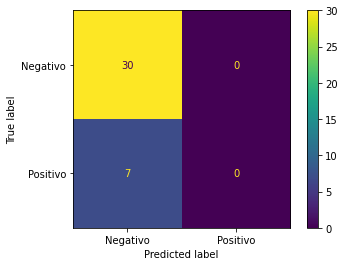

In [24]:
plot_confusion_matrix(clf_svm,X_test,y_teste,display_labels=['Negativo','Positivo'])

In [43]:
nn = Modelos.NN(Modelos,X_train,y_train)

Train on 328 samples
328/328 [==============================] - 0s 247us/sample - loss: 0.4584 - acc: 0.8567


In [48]:
y_predict = nn.predict(X_test.to_numpy())
y_predict =  np.where(y_predict  > 0.8, 1, 0)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [47]:
print(y_predict)

[[0.12233434]
 [0.14454965]
 [0.09601983]
 [0.05331418]
 [0.17845728]
 [0.12307519]
 [0.1846591 ]
 [0.2425992 ]
 [0.14324473]
 [0.24438292]
 [0.0524053 ]
 [0.13760446]
 [0.1029557 ]
 [0.14904301]
 [0.13196225]
 [0.04016168]
 [0.08953942]
 [0.04291432]
 [0.16743301]
 [0.12837915]
 [0.13579781]
 [0.10452837]
 [0.14727008]
 [0.15109141]
 [0.18328767]
 [0.15013738]
 [0.31020132]
 [0.06078754]
 [0.07435106]
 [0.0638345 ]
 [0.05720014]
 [0.11450051]
 [0.13751693]
 [0.11014868]
 [0.18291213]
 [0.17337595]
 [0.04681817]]


In [46]:
Tratamento.confusion(Tratamento,y_teste,y_predict)

ValueError: Classification metrics can't handle a mix of binary and continuous targets